# [Topic Modeling](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [3]:

from pprint import pprint
import numpy as np
np.random.seed(2018)
import nltk

# reload only imported modules before run
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

'''
pantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
standford source: https://nlp.stanford.edu/software/CRF-NER.shtml
standford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp
'''

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\npantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html\nstandford source: https://nlp.stanford.edu/software/CRF-NER.shtml\nstandford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp\n'

### constants

In [4]:
start_date = '01-01-2018' #  09-Sep-2018 
end_date = '30-12-2018' # 01-Oct-2018

### We will perform the following steps:

#### 1. Tokenization: 
Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [3]:
# def tokenize(text):
#     return gensim.utils.simple_preprocess(text)

#### 2. Remove small words:
Words that have fewer than 3 characters are removed.

In [4]:
# def isShortWord(token):
#     return len(token) < 3

#### 3. Remove stopwords:
All stopwords are removed.

In [5]:
# def isStopWord(token):
#     return token in gensim.parsing.preprocessing.STOPWORDS

#### 4. lemmatized +  Stemming:
Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

In [6]:
# from nltk.corpus import wordnet as wn
# from nltk import pos_tag, word_tokenize
# from nltk.stem.porter import *
# from textblob import TextBlob


# def lemmatize_stemming(token):
#     stemmer = PorterStemmer() #gensim.parsing.stem_text(tokenize) #
#     for word, tag in pos_tag(word_tokenize(token)):
#         wntag = tag[0].lower()
#         wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
#         lemma = WordNetLemmatizer().lemmatize(word, wntag) if wntag else word
#         return TextBlob(lemma).words[0].singularize()
#     return ''

#### 5. Replace Emojis:

In [7]:
# ## get emoji characters file path
# def getEmojis():
#     from dataSource import getEmojis
#     comments_file_path = getDataSourcePathFor(emoji_path)
#     return getEmojis(comments_file_path)#.head()

In [8]:
# def hasEmojicon(token):
    
# def replaceEmojicons(token, emojies):
#     pass
    

## Data Source

In [9]:
# def getNounList(sentence='', tokens = []):
#     from nltk import word_tokenize, pos_tag
#     if len(tokens) > 0:    
#         nouns = [token for token, pos in pos_tag(tokens) if pos.startswith('NN')]
#         return nouns
#     else:
#         nouns = [token for token, pos in pos_tag(word_tokenize(sentence)) if pos.startswith('NN')]
#         return nouns

In [10]:
# text = 'I Have done reviewing, Will be seeing by them'
# print(preprocess(text))

In [11]:
# key is file storage path
# def getDataSourcePathFor(keyForFilePath):
#     import json
#     import os
    
#     config_file_path = os.environ[virtual_env] + '/config.json'

#     with open(config_file_path) as f:
#         config = json.load(f)
#         if keyForFilePath in config:# ['comments_path', 'output_path']
#             return config[keyForFilePath] 
#     return None

In [12]:
# ## get list of comments from stored input csv file
# import dataSource 

# def getListOfComments():
#     ### This is to get csv rows between given dates
#     comments_file_path = getDataSourcePathFor(comments_path)
#     commentsList = getComments(comments_file_path, start_date, end_date) #['comments'] 
#     commentsList = commentsList.sort_values(by='ratings', ascending=True)['comments'] 
#     print('Total number of comments: %s between %s and %s' % (len(commentsList), start_date, end_date))
#     return commentsList

### Text processing

In [13]:
# import re

# def filterWord(token):
#     if not (isStopWord(token) or isShortWord(token)):
#         lemmaWord = lemmatize_stemming(token)
#         if not isShortWord(lemmaWord):
#             return ("".join(re.findall("[a-zA-Z]+", lemmaWord)).lower())
#     return None 
    
# def filters(sentence):
# #     print('..given comments:', sentence)
#     result = []
#     #nouns = getNounList(sentence) # fetch only Nouns
#     for token in tokenize(sentence):#nouns: ###tokenize(text):
#         result.append(filterWord(token))
#     return result

# def filterWords(tokens):
#     return list(filter(lambda token: filterWord(token), tokens))

In [14]:
# def preprocessCommentDocument(document):
#     return list(map(lambda sentence: filters(sentence), document))

### Word Cloud

In [15]:
# from wordCloud import showWordCloud
# def showCloud(topicCollection):
#     showWordCloud(topicCollection) 

### Bag of Words on the Data set

In [16]:
def bow(processed_docs):
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    return bow_corpus

### Sentiment

In [17]:
# from getSentiment import getSentiment

# def getSentFromCommentList(commentList):
#     sentimentList = []
#     for sentence in commentList:
#         sentiment = getSentiment(sentence)
#         sentimentList.append(sentiment)
#     return sentimentList


# def isNegative(sentiment):
#     return sentiment > 0.5


# def tokenDictWithPosNegSentiment(sentimentList, document):
#     sentDict = {}
#     size = range(len(document))
    
#     for i in size:
#         for token in document[i]:
#             v = (0, 0, 0) # (neg, pos, freq)
#             if token in sentDict:
#                 v = sentDict[token]
                
#             if isNegative(sentimentList[i]):
#                 v = (v[0]+1, v[1], v[2]+1)
#             else:
#                 v = (v[0], v[1]+1, v[2]+1)
#             sentDict[token] = v
#     sentDict.pop('', None)
#     return sentDict 

### Main()

In [18]:
# from py import SDataSource
# from py import SConstants
# from py.SWordList import SWordList
# from py.sUtility import SUtility
# from py.sPreprocessor import SPreprocessor


In [50]:
# sutility = SUtility()
# spreprocessor = SPreprocessor()

# # SPreprocessor.resolveDependancy(trieCommon)
# dateBetween = [start_date, end_date]
# df = SDataSource.getListOfCommentsFromPkl(dateBetween)

# commentsDocument = df['comment']
# print('filtered comments: ', len(commentsDocument))

# def setFilter(row):
#     processed_doc = []
#     # document preprocessing, cleaning, filtering, replacement, spliting into multiple senetnces from one
#     for each in spreprocessor.docCleaning(row['comment'], False): #should split by ','
#         processed_doc.append(each)
#     return processed_doc

# df['processed_doc'] = df.apply(setFilter, axis=1)
# print(df.head(2))

dateBetween = [start_date, end_date]
oper_for_processed_doc(dateBetween)

filtered comments:  12485
                 name            date  \
12010  Devang panchal  1 January 2018   
12128   A Google user  1 January 2018   

                                                 comment rating     id  \
12010  I love the digibank app it is very easy to use...      5  12010   
12128  Waste app.. Very small little thing.. Phone nu...      1  12128   

      formatedDate                                      processed_doc  
12010   2018-01-01  [i love the digibank app it is very easy to us...  
12128   2018-01-01  [waste app very small little thing phone numbe...  


In [20]:
# def makeDict(sentence):
#     t = spreprocessor.parseToTokens(trieTopic, sentence)
#     r = spreprocessor.parseToTokens(trieNReason, sentence)
#     print(sentence)
#     print('topic is:', t)
#     print('reasons are:', r)
#     print()
#     sutility.dump(t, r)

In [21]:
# wordList_file = SDataSource.getDataSourcePathFor(SConstants.wordFile_path)
# trieCommon = SWordList(wordList_file)

# topic_file = SDataSource.getDataSourcePathFor(SConstants.topic_path)
# trieTopic = SWordList(topic_file)

# n_reason_file = SDataSource.getDataSourcePathFor(SConstants.p_reason_path)
# trieNReason = SWordList(n_reason_file)

..SWordList constructor called 
..SWordList constructor called 
..SWordList constructor called 


In [22]:
# def getTopics(doc):
#     return spreprocessor.parseToTokens(trieTopic, str(doc))
# df['topic'] = df['processed_doc'].apply(getTopics)

In [23]:
# def getReasons(doc):
#     return spreprocessor.parseToTokens(trieNReason, str(doc))
# df['reason'] = df['processed_doc'].apply(getReasons)

In [49]:
# combined corpus to map to improve search results
import pandas as pd

df = pd.read_pickle('combined_corpus.pkl')
df.columns = ['token', 'token_id']
mapStore = {}

for i in range(len(pairs)):
    mapStore[df.iloc[i]['token']] = df.iloc[i]['token_id']

# print(mapStore)

In [ ]:
apsentTopic = {}
def topicIntArray(topicStrList):
    numList = []
    for each in topicStrList:
        if each is not None:
            if each in mapStore:
                numList.append(mapStore[each])
            else:
                apsentTopic[each] = None
    return numList 

In [ ]:
df['topicIntList'] = df['topic'].apply(topicIntArray)
# [print('..%s.. topic is missing in topic corpus' % missingTopic) for missingTopic in apsentTopic ]

In [ ]:
df['reasonIntList'] = df['reason'].apply(topicIntArray)
# [print('..%s.. topic is missing in topic corpus' % missingTopic) for missingTopic in apsentTopic ]

In [191]:
df.head(5)
# df['processed_doc'][12010]

['i love the digibank app it is very easy to use  you should have included the mutual fund function in the internet banking that would be wonderful  the only problem is the app is slow while open anything  request if the team could just speed up the things in the app']

In [59]:
l = ['crashing', 'changes', 'upi', 'biometric']
print(spreprocessor.filterWords(l))

['crash', 'chang', 'upi', 'biometr']


In [151]:
from py.sProcess import sProcessForDB
sp = sProcessForDB()
# --------------------------------------

In [106]:
#===========  danger ============================
# sp.performOperationOnComments()
# storeDataAfterOperationOnComment
# sp.dumpNewCommentsIntoDB() 

query is:  INSERT INTO `dbs_master` VALUES (NULL, '15945','account','money','2019-02-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15884','None','good','2019-02-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15884','None','interest rate','2019-02-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15610','customer care','servic','2019-02-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15888','app','servic','2019-02-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15013','app','servic','2019-02-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15013','customer service','servic','2019-02-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12145','app','faster','2019-02-27 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15958','app','add','2019-02-26 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15958','transact','very good','2019-02-26 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15958','transact','good','2019-02-26 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15958','transact','add','2019-02-26 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15889','app','very good','2019-02-26 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15889','app','good','2019-02-26 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15450','app','nice','2019-02-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15736','offer','good','2019-02-25 00:00:00','3',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15551','app','good','2019-02-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15602','app','good','2019-02-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15926','app','add','2019-02-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15926','updat','add','2019-02-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15757','app','slow','2019-02-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15757','speed','slow','2019-02-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11545','app','nice','2019-02-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13523','app','use','2019-02-24 00:00:00','5','0','0')
-- successful -

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12919','app','nice','2019-02-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11854','transact','very good','2019-02-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11854','transact','good','2019-02-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15648','app','nice','2019-02-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15758','account','easi','2019-02-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15758','app','easi','2019-02-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15657','debit cards','debit cards','2019-02-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15561','app','awesom','2019-02-20 00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15641','app','easi','2019-02-18 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15502','app','superb','2019-02-18 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15685','app','nice','2019-02-18 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15667','app','good','2019-02-18 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15686','atm','good','2019-02-18 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15686','atm','atm','2019-02-18 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10562','app','nice','2019-02-18 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13834','account','easi','2019-02-17 00:00:00','5','0','0')
-- successf

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15799','biometr','easi','2019-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15799','biometr','balanc','2019-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15799','biometr','atm','2019-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15799','None','love','2019-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15799','None','easi','2019-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15799','None','balanc','2019-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15799','None','atm','2019-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15807','secur','good','2019-02-16 00:00:00','3','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15328','atm','money','2019-02-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15328','None','atm','2019-02-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15328','None','money','2019-02-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14492','account','servic','2019-02-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14492','account','good','2019-02-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10650','app','very good','2019-02-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10650','app','good','2019-02-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13537','app','nice','2019-02-14 00:00:00','5','0','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14937','app','very good','2019-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14937','app','good','2019-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14937','app','easi','2019-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14937','app','transfer','2019-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14937','app','money','2019-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14937','app','nice','2019-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12875','app','nice','2019-02-12 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12875','app','use','2019-02-12 00:00:00','4','0','0')
-- succ

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14920','app','good','2019-02-10 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14920','app','slow','2019-02-10 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14699','debit cards','add','2019-02-10 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14699','debit cards','money','2019-02-10 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14699','debit cards','debit cards','2019-02-10 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13728','app','good','2019-02-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14621','app','nice','2019-02-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14736','app','slow','2019-02-10 00:00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14616','account','nice','2019-02-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14688','None','interest rates','2019-02-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14688','None','easi','2019-02-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14688','None','awesom','2019-02-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14688','None','servic','2019-02-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14688','account','interest rates','2019-02-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14688','account','easi','2019-02-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14688','account','awesom','2019

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15189','offer','awesom','2019-02-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14578','app','nice','2019-02-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14578','app','easi','2019-02-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14578','otp','nice','2019-02-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14578','otp','easi','2019-02-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11072','app','good','2019-02-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13589','app','use','2019-02-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13579','app','nice','2019-02-06 00:00:00','5','0','0')
-- successful

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13717','app','nice','2019-02-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14722','transact','good','2019-02-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15041','account','slow','2019-02-05 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15041','app','slow','2019-02-05 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13985','app','easi','2019-02-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14361','None','good','2019-02-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14361','None','interest rates','2019-02-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13053','app','nice','2019-02-05 00:00:00','5','0',

query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','app','servic','2019-02-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','app','very good','2019-02-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','app','good','2019-02-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','app','add','2019-02-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','debit card','servic','2019-02-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','debit card','very good','2019-02-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','debit card','good','2019-02-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14894','debit card','add','2019-02-04 00:00:00','5','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15199','signup','servic','2019-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15199','account','citi','2019-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15199','account','servic','2019-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15199','debit card','citi','2019-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15199','debit card','servic','2019-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15199','permiss','citi','2019-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15199','permiss','servic','2019-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14993','account','citi','2019-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13878','app','nice','2019-02-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15261','customer care','servic','2019-02-02 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15213','app','add','2019-02-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15213','app','money','2019-02-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15213','app','use','2019-02-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15213','debit card','add','2019-02-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15213','debit card','money','2019-02-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15213','debit card','use','2019-02-02 00:00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15184','offer','balanc','2019-02-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15184','offer','interest rate','2019-02-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15184','offer','atm','2019-02-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15184','offer','nice','2019-02-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13330','app','love','2019-02-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15167','transact','money','2019-02-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13876','app','good','2019-02-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13876','app','easi','2019-02-01 00:00:00','4','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15319','biometr','servic','2019-01-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14643','app','slow','2019-01-31 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15023','login','transfer','2019-01-30 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15023','app','transfer','2019-01-30 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15023','customer care','transfer','2019-01-30 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14811','app','very good','2019-01-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14811','app','good','2019-01-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13988','app','good','2019-01-30 00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13631','app','good','2019-01-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15198','app','easi','2019-01-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15198','app','citi','2019-01-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15198','account','easi','2019-01-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15198','account','citi','2019-01-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11965','atm','atm','2019-01-29 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15128','customer service','servic','2019-01-29 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15128','account','servic','2019-01-29 00:00:00','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9707','transact','slow','2019-01-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14731','login','servic','2019-01-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14731','account','servic','2019-01-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14378','app','good','2019-01-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14378','app','easi','2019-01-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14468','customer service','servic','2019-01-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11914','account','awesom','2019-01-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14694','customer care','servic','201

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10734','app','use','2019-01-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12232','app','good','2019-01-26 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12232','app','servic','2019-01-26 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12232','transact','good','2019-01-26 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12232','transact','servic','2019-01-26 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12066','account','money','2019-01-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10570','app','nice','2019-01-26 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15280','balanc','balanc','2019-01-26 00:00:00','5','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15329','balanc','servic','2019-01-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15329','balanc','good','2019-01-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15329','balanc','balanc','2019-01-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13906','customer service','servic','2019-01-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15314','debit card','transfer','2019-01-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13201','app','good','2019-01-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14112','app','good','2019-01-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15188','account','add','2019-01-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14204','app','good','2019-01-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14204','app','easi','2019-01-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14935','app','use','2019-01-24 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11579','app','nice','2019-01-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13682','app','nice','2019-01-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13655','speed','good','2019-01-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14938','internet','very good','2019-01-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14938','internet','good','2019-01-24 00:00:00','4','0','0')


-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15325','internet','good','2019-01-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15325','internet','money','2019-01-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14825','updat','credit card','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14859','app','add','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14859','app','transfer','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15005','app','good','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15005','offer','good','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11650','app','use','2019-01-22 00:00:00','5','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13916','app','nice','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13254','app','good','2019-01-22 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13297','app','nice','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13925','app','easi','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13950','app','good','2019-01-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13511','app','very good','2019-01-22 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13511','app','good','2019-01-22 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14015','app','awesom','2019-01-22 00:00:00','4','0','0')
-- succes

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15218','transact','hasslefre','2019-01-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15218','offer','hasslefre','2019-01-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15205','app','good','2019-01-21 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13294','app','nice','2019-01-21 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13287','app','good','2019-01-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15159','app','slow','2019-01-21 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15159','transact','slow','2019-01-21 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15151','account','money','2019-01-21 00:00:00','1

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15322','service charge','servic','2019-01-20 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15322','charg','atm','2019-01-20 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15322','charg','unlimit','2019-01-20 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15322','charg','servic','2019-01-20 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14971','account','awesom','2019-01-20 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11858','app','good','2019-01-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11858','app','very good','2019-01-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11141','app','love','2019-01-20 00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12043','app','good','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12043','login','nice','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12043','login','good','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14884','app','balanc','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14884','account','balanc','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14884','offer','balanc','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14884','balanc','balanc','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11599','app','good','2019-01-19 00:00:00','5','0',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14355','app','servic','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14546','balanc','balanc','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14546','account','balanc','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14387','app','nice','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14387','app','good','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14387','app','servic','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14289','app','nice','2019-01-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '14289','app','easi','2019-01-19 00:00:00','5','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10447','app','money','2019-01-15 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12046','account','money','2019-01-15 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '13943','app','good','2019-01-15 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15186','upi','transfer','2019-01-15 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15138','upi','money','2019-01-15 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15282','updat','slow','2019-01-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15282','updat','faster','2019-01-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '15282','updat','add','2019-01-14 00:00:00','3','0','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3906','app','awesom','2019-01-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3906','app','activ','2019-01-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12148','atm','atm','2019-01-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10212','account','money','2019-01-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12199','app','credit card','2019-01-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12199','app','servic','2019-01-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12182','account','servic','2019-01-10 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12182','customer service','servic','2019-01-10 00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12235','debit card','slow','2019-01-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12235','debit card','money','2019-01-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12235','transact','slow','2019-01-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12235','transact','money','2019-01-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10615','app','good','2019-01-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10684','app','good','2019-01-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10743','app','very good','2019-01-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10743','app','good','2019-01-04 00:00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11269','atm','withdraw','2018-12-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11939','app','slow','2018-12-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10789','app','use','2018-12-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10789','app','transfer','2018-12-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10789','app','nice','2018-12-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12191','app','nice','2018-12-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12191','app','easi','2018-12-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12236','app','slow','2018-12-27 00:00:00','1','0','0')
-- succes

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12278','biometr','servic','2018-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12278','updat','servic','2018-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12179','upi','transfer','2018-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12179','upi','money','2018-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12179','app','transfer','2018-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12179','app','money','2018-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10872','app','slow','2018-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12116','version','add','2018-12-22 00:00:00','1','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12203','account','money','2018-12-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12203','account','servic','2018-12-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12113','atm','atm','2018-12-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12113','upi','atm','2018-12-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12113','account','atm','2018-12-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10026','app','good','2018-12-17 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12126','updat','servic','2018-12-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12126','updat','money','2018-12-17 00:00:00','1','0','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10873','account','money','2018-12-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11875','app','very good','2018-12-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11875','app','good','2018-12-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12048','transact','withdraw','2018-12-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12048','transact','money','2018-12-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12048','transact','atm','2018-12-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12048','atm','withdraw','2018-12-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '12048','atm','money','2018-12-13 00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11113','app','servic','2018-12-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11356','app','nice','2018-12-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11356','app','good','2018-12-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11356','app','add','2018-12-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11390','account','servic','2018-12-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11244','app','good','2018-12-07 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11244','updat','good','2018-12-07 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11380','login','love','2018-12-07 00:00:00','2','0','0')
-- su

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10662','transact','good','2018-12-03 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8339','app','good','2018-12-03 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11105','app','awesom','2018-12-03 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11338','atm','atm','2018-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11338','debit card','atm','2018-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11338','app','atm','2018-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11254','debit card','add','2018-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11254','debit card','money','2018-12-03 00:00:00','1','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11270','atm','unlimit','2018-12-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11270','atm','atm','2018-12-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11270','atm','withdraw','2018-12-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11270','atm','love','2018-12-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11277','app','activ','2018-12-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11277','debit card','activ','2018-12-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10036','app','awesom','2018-12-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10036','app','servic','2018-12-01 00:00:00','5','0','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11171','app','good','2018-11-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11171','app','online banking','2018-11-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11284','app','add','2018-11-29 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11284','app','money','2018-11-29 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11284','app','debit cards','2018-11-29 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11284','debit cards','add','2018-11-29 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11284','debit cards','money','2018-11-29 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '11284','debit cards','debit cards','20

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','None','balanc','2018-11-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','atm','unlimit','2018-11-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','atm','atm','2018-11-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','atm','withdraw','2018-11-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','atm','balanc','2018-11-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','balanc','unlimit','2018-11-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','balanc','atm','2018-11-25 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10904','balanc','withdraw','2018-11-25 00:00:00','5'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10912','look','slow','2018-11-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10912','updat','slow','2018-11-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10912','back option','slow','2018-11-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10787','app','ifsc','2018-11-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10787','ifsc','ifsc','2018-11-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10202','customer service','servic','2018-11-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10714','app','love','2018-11-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10714','app','easi','2018-11-22 00:00:00','5

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10817','debit card','money','2018-11-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10933','app','very good','2018-11-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10933','app','good','2018-11-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10731','balanc','balanc','2018-11-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10731','account','balanc','2018-11-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10725','debit card','money','2018-11-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10600','app','good','2018-11-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7918','atm','atm','2018-11-19 00:00:00'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10909','transact','superb','2018-11-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10909','login','superb','2018-11-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10909','app','superb','2018-11-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4997','debit card','add','2018-11-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4997','debit card','debit cards','2018-11-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4997','debit card','money','2018-11-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4997','debit card','use','2018-11-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4997','app','add','2018-11-1

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4006','app','nice','2018-11-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10461','app','good','2018-11-14 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10461','app','transfer','2018-11-14 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10461','login','good','2018-11-14 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10461','login','transfer','2018-11-14 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5905','app','nice','2018-11-14 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10936','debit card','money','2018-11-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10936','debit card','transfer','2018-11-14 00:00:00',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10929','app','servic','2018-11-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10922','login','servic','2018-11-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10922','debit card','servic','2018-11-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10922','app','servic','2018-11-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7777','app','love','2018-11-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7755','app','nice','2018-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10861','debit card','activ','2018-11-12 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10192','app','good','2018-11-12 00:00:00','5','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10375','app','good','2018-11-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10375','app','slow','2018-11-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10332','app','very good','2018-11-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10332','app','good','2018-11-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7321','app','easi','2018-11-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10294','app','nice','2018-11-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8497','app','very good','2018-11-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8497','app','good','2018-11-11 00:00:00','5','0','0')
-- succes

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10457','app','withdraw','2018-11-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10457','atm','atm','2018-11-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10457','atm','withdraw','2018-11-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10463','version','slow','2018-11-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10463','app','slow','2018-11-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10463','internet','slow','2018-11-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10437','app','slow','2018-11-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10437','app','faster','2018-11-06 00:00:00','1','0','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','updat','balanc','2018-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','updat','add','2018-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','updat','money','2018-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','account','balanc','2018-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','account','add','2018-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','account','money','2018-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','balanc','balanc','2018-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8821','balanc','add','2018-10-31 00:00:00','1','0',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10149','customer care','money','2018-10-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10149','upi','servic','2018-10-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10149','upi','add','2018-10-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10149','upi','money','2018-10-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10149','app','servic','2018-10-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10149','app','add','2018-10-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10149','app','money','2018-10-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5790','app','money','2018-10-27 00:00:00','5','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9939','balanc','money','2018-10-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9939','balanc','balanc','2018-10-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10083','offer','interest rates','2018-10-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10083','account','interest rates','2018-10-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10083','None','interest rates','2018-10-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10081','debit card','add','2018-10-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '10081','debit card','money','2018-10-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9911','app','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9924','app','slow','2018-10-16 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9604','app','good','2018-10-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9828','upi','good','2018-10-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9828','upi','servic','2018-10-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9828','app','good','2018-10-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9828','app','servic','2018-10-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9828','customer service','good','2018-10-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9828','customer service','servic','2018-10-16 00:00:00','4','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9689','app','credit card','2018-10-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9689','transact','good','2018-10-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9689','transact','easi','2018-10-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9689','transact','credit card','2018-10-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9784','customer service','servic','2018-10-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9820','app','very good','2018-10-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9820','app','good','2018-10-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9820','login','very good','20

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9634','atm','atm','2018-10-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6456','customer service','servic','2018-10-04 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7699','app','nice','2018-10-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9630','app','very good','2018-10-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9630','app','good','2018-10-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9572','app','good','2018-10-03 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9135','account','money','2018-10-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9819','app','transfer','2018-10-03 00:00:00','2','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9618','app','love','2018-09-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9407','charg','atm','2018-09-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9407','atm','atm','2018-09-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8827','app','good','2018-09-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8827','app','nice','2018-09-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8827','offer','good','2018-09-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8827','offer','nice','2018-09-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9657','atm','atm','2018-09-29 00:00:00','5','0','0')
-- successful --
quer

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','app','awesom','2018-09-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','app','love','2018-09-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','app','credit card','2018-09-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','debit card','very good','2018-09-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','debit card','good','2018-09-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','debit card','easi','2018-09-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','debit card','awesom','2018-09-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9808','debit card','love','2018-09

query is:  INSERT INTO `dbs_master` VALUES (NULL, '8725','app','very good','2018-09-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8725','app','good','2018-09-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9263','app','servic','2018-09-22 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9263','app','good','2018-09-22 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9300','updat','slow','2018-09-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9300','login','slow','2018-09-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9300','app','slow','2018-09-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9300','internet','slow','2018-09-21 00:00:00','1','0','0')
-- successful --
query is

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8907','login','slow','2018-09-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8569','app','good','2018-09-18 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8569','app','servic','2018-09-18 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9002','updat','good','2018-09-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9002','login','good','2018-09-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9002','app','good','2018-09-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9412','app','slow','2018-09-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9272','login','good','2018-09-17 00:00:00','1','0','0')
-- successful 

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9451','transact','money','2018-09-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9495','app','transfer','2018-09-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9495','upi','transfer','2018-09-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9495','account','transfer','2018-09-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8947','login','very good','2018-09-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8947','login','good','2018-09-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8947','login','servic','2018-09-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8947','app','very good','2018-09-13 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9314','account','slow','2018-09-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7949','debit card','add','2018-09-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7949','debit card','money','2018-09-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7949','debit card','transfer','2018-09-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7949','debit card','good','2018-09-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9187','updat','money','2018-09-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9187','app','money','2018-09-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9187','login','money','2018-09-11 00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9233','debit card','slow','2018-09-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9345','app','servic','2018-09-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9345','login','servic','2018-09-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9452','app','servic','2018-09-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9452','login','servic','2018-09-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9452','customer service','servic','2018-09-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7070','app','use','2018-09-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9227','updat','slow','2018-09-08 00:00:00','1

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','None','interest rates','2018-09-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','None','good','2018-09-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','app','money','2018-09-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','app','interest rates','2018-09-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','app','good','2018-09-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','login','money','2018-09-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','login','interest rates','2018-09-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9455','login','good','2018-09-04 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','transact','withdraw','2018-09-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','transact','atm','2018-09-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','account','unlimit','2018-09-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','account','withdraw','2018-09-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','account','atm','2018-09-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','atm','unlimit','2018-09-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','atm','withdraw','2018-09-01 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9311','atm','atm','2018-09-01 00:00:00',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9421','account','good','2018-08-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8937','upi','transfer','2018-08-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8937','account','transfer','2018-08-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8937','transact','transfer','2018-08-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8937','app','transfer','2018-08-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9110','app','servic','2018-08-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9110','customer service','servic','2018-08-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9084','app','good','2018-08-31 0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9298','app','slow','2018-08-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9395','transact','unlimit','2018-08-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9395','transact','withdraw','2018-08-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9395','transact','atm','2018-08-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9395','transact','nice','2018-08-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9395','transact','add','2018-08-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9395','transact','money','2018-08-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9395','atm','unlimit','2018-08-26 00:00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','updat','transfer','2018-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','updat','money','2018-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','login','transfer','2018-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','login','money','2018-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','app','transfer','2018-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','app','money','2018-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','upi','transfer','2018-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9506','upi','money','2018-08-24 00:00:00','3','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9408','login','love','2018-08-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9408','updat','love','2018-08-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9408','app','love','2018-08-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8927','account','easi','2018-08-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8927','account','transfer','2018-08-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8927','account','money','2018-08-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8927','account','servic','2018-08-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8927','debit card','easi','2018-08-21 00:00:00','5'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8730','balanc','balanc','2018-08-18 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8999','updat','good','2018-08-18 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8999','login','good','2018-08-18 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8736','debit card','money','2018-08-18 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9293','ifsc','servic','2018-08-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9293','ifsc','ifsc','2018-08-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9480','login','servic','2018-08-17 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9480','look','servic','2018-08-17 00:00:00','3','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9440','account','very good','2018-08-15 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9440','account','good','2018-08-15 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9307','login','slow','2018-08-15 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8938','app','servic','2018-08-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8938','app','good','2018-08-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8938','app','slow','2018-08-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8938','login','servic','2018-08-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8938','login','good','2018-08-14 00:00:00','3','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','upi','debit cards','2018-08-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','upi','money','2018-08-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','transect','debit cards','2018-08-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','transect','money','2018-08-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','account','debit cards','2018-08-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','account','money','2018-08-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','app','debit cards','2018-08-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9370','app','money','2018-08-

query is:  INSERT INTO `dbs_master` VALUES (NULL, '9090','otp','atm','2018-08-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9090','transect','atm','2018-08-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '9090','atm','atm','2018-08-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7764','app','very good','2018-08-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7764','app','good','2018-08-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8573','app','easi','2018-08-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4941','app','servic','2018-08-08 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8210','app','easi','2018-08-08 00:00:00','3','0','0')
-- successful --
query is:  INSE

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8184','transact','slow','2018-08-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8184','transact','money','2018-08-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8184','account','slow','2018-08-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8184','account','money','2018-08-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7966','transact','money','2018-08-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7828','atm','atm','2018-08-04 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8818','app','slow','2018-08-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8818','transact','slow','2018-08-04 00:00:00','1','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8117','app','good','2018-08-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8117','login','good','2018-08-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8224','app','easi','2018-07-31 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8224','app','good','2018-07-31 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8224','app','money','2018-07-31 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8224','app','transfer','2018-07-31 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8224','updat','easi','2018-07-31 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8224','updat','good','2018-07-31 00:00:00','2','0','0')
-- successful

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7816','app','nice','2018-07-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7845','app','good','2018-07-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7845','app','slow','2018-07-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4306','debit card','add','2018-07-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4306','debit card','money','2018-07-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4306','account','add','2018-07-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4306','account','money','2018-07-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8198','app','good','2018-07-27 00:00:00','3','0','0')
--

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','account','student','2018-07-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','account','add','2018-07-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','account','money','2018-07-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','account','atm','2018-07-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','internet','awesom','2018-07-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','internet','servic','2018-07-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','internet','student','2018-07-22 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8191','internet','add','2018-07-22 00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8020','secur','good','2018-07-18 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8020','secur','money','2018-07-18 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8020','secur','transfer','2018-07-18 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8106','app','love','2018-07-18 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7370','app','slow','2018-07-18 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7391','app','transfer','2018-07-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7391','app','money','2018-07-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7960','app','awesom','2018-07-17 00:00:00','5','0','0')
-- suc

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7941','customer service','easi','2018-07-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8147','app','servic','2018-07-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8147','login','servic','2018-07-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8147','debit card','servic','2018-07-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8230','app','add','2018-07-13 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8230','app','awesom','2018-07-13 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8230','upi','add','2018-07-13 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8230','upi','awesom','2018-07-13 00:00:00','2','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8174','look','balanc','2018-07-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8174','balanc','balanc','2018-07-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8174','transact','balanc','2018-07-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8174','debit card','balanc','2018-07-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7924','debit card','add','2018-07-09 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7924','debit card','money','2018-07-09 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8218','app','love','2018-07-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '8218','app','transfer','2018-07-09 00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7505','atm','atm','2018-07-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7505','atm','withdraw','2018-07-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7505','account','good','2018-07-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7505','account','unlimit','2018-07-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7505','account','atm','2018-07-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7505','account','withdraw','2018-07-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7491','app','servic','2018-07-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7491','app','add','2018-07-06 00:00:00','4','0','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7571','transact','balanc','2018-07-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7571','account','balanc','2018-07-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7266','app','slow','2018-06-30 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6996','app','nice','2018-06-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7419','app','servic','2018-06-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7507','customer service','servic','2018-06-30 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7507','transect','servic','2018-06-30 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7507','offer','servic','2018-06-30 00:00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7450','debit card','activ','2018-06-25 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7450','debit card','servic','2018-06-25 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7520','transact','withdraw','2018-06-24 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7520','app','withdraw','2018-06-24 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6961','app','good','2018-06-24 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5962','app','very good','2018-06-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5962','app','good','2018-06-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5493','atm','use','2018-06-23 00:00:00','4'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7552','app','good','2018-06-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7552','app','credit card','2018-06-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7552','transact','servic','2018-06-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7552','transact','good','2018-06-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7552','transact','credit card','2018-06-19 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7530','account','good','2018-06-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6966','app','nice','2018-06-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6964','app','good','2018-06-19 00:00:00','3

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7191','app','good','2018-06-14 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7191','app','servic','2018-06-14 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7182','offer','good','2018-06-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6651','atm','servic','2018-06-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6651','atm','atm','2018-06-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7553','version','transfer','2018-06-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7580','app','slow','2018-06-13 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7580','account','slow','2018-06-13 00:00:00','2','0','0')
-- succ

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7437','account','transfer','2018-06-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7437','account','money','2018-06-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7584','app','servic','2018-06-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7572','customer service','good','2018-06-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7572','customer service','servic','2018-06-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7572','transact','good','2018-06-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7572','transact','servic','2018-06-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7463','secur','money','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7403','app','slow','2018-06-08 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7403','login','slow','2018-06-08 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7064','app','awesom','2018-06-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6677','app','good','2018-06-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6677','app','slow','2018-06-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7535','account','money','2018-06-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7535','app','money','2018-06-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7073','app','very good','2018-06-08 00:00:00','4','0','0')
-- succes

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','updat','servic','2018-06-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','updat','money','2018-06-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','app','servic','2018-06-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','app','money','2018-06-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','login','servic','2018-06-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','login','money','2018-06-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','transact','servic','2018-06-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7594','transact','money','2018-06-05 00:00:00','1','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7523','dashboard','citi','2018-05-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7523','account','citi','2018-05-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7523','postal code','citi','2018-05-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6228','app','add','2018-05-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6228','upi','add','2018-05-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7180','app','slow','2018-05-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7180','app','good','2018-05-31 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '7413','back option','add','2018-05-30 00:00:00','4','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6856','transact','awesom','2018-05-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6799','otp','good','2018-05-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6804','app','slow','2018-05-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6819','login','good','2018-05-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6821','app','money','2018-05-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6838','app','servic','2018-05-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6838','app','good','2018-05-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6765','app','good','2018-05-28 00:00:00','4','0','0')
-- successfu

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6833','debit card','very good','2018-05-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6833','debit card','good','2018-05-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6019','balanc','awesom','2018-05-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6019','balanc','balanc','2018-05-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6019','balanc','unlimit','2018-05-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6019','balanc','atm','2018-05-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6019','balanc','withdraw','2018-05-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6019','atm','awesom','2018-05-24 0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6583','debit card','good','2018-05-20 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6644','transact','good','2018-05-20 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6644','transact','money','2018-05-20 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6616','app','servic','2018-05-20 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6616','app','good','2018-05-20 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6637','app','awesom','2018-05-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6567','app','use','2018-05-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6654','debit card','servic','2018-05-19 00:00:00','3','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6618','balanc','transfer','2018-05-16 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6624','app','slow','2018-05-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6357','app','love','2018-05-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6604','app','good','2018-05-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6604','app','averag','2018-05-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6577','login','awesom','2018-05-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6577','login','easi','2018-05-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6577','login','good','2018-05-16 00:00:00','5','0','0')
-- succ

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6630','updat','slow','2018-05-12 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6625','app','servic','2018-05-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6625','app','good','2018-05-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6625','app','easi','2018-05-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6153','app','atm','2018-05-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6153','transact','atm','2018-05-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6153','account','atm','2018-05-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6153','atm','atm','2018-05-12 00:00:00','1','0','0')
-- successful -

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6463','app','money','2018-05-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6463','app','servic','2018-05-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6459','app','slow','2018-05-10 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6459','app','servic','2018-05-10 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6459','account','slow','2018-05-10 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6459','account','servic','2018-05-10 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6444','app','slow','2018-05-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6448','app','good','2018-05-09 00:00:00','4','0','0')
-- succes

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5949','app','online banking','2018-05-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6406','app','awesom','2018-05-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6048','signup','servic','2018-05-05 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6464','app','add','2018-05-05 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6464','app','money','2018-05-05 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6464','debit card','add','2018-05-05 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6464','debit card','money','2018-05-05 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6410','app','slow','2018-05-05 00:00:00','2','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6501','another bank','money','2018-05-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6467','updat','add','2018-05-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6467','updat','money','2018-05-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6467','app','add','2018-05-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6467','app','money','2018-05-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6467','debit card','add','2018-05-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6467','debit card','money','2018-05-02 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5980','app','slow','2018-05-02 00:00:00','5','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5957','app','good','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5957','None','very good','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5957','None','good','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6452','None','interest rate','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6452','None','balanc','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6452','None','unlimit','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6452','None','atm','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6452','account','interest rate','2018-05-01 00:00:00',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6366','app','nice','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6366','app','awesom','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6366','secur','nice','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6366','secur','awesom','2018-05-01 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6376','app','slow','2018-05-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6484','app','very good','2018-05-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6484','app','good','2018-05-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6484','app','slow','2018-05-01 00:00:00','3','0','0')
-- successf

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6309','login','slow','2018-04-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1904','app','nice','2018-04-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6060','app','add','2018-04-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6060','app','money','2018-04-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6131','account','servic','2018-04-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6131','account','transfer','2018-04-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6131','account','money','2018-04-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6034','account','add','2018-04-28 00:00:00','3','0','0')


-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6315','netbank','add','2018-04-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6242','app','good','2018-04-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6242','app','easi','2018-04-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6242','account','good','2018-04-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6242','account','easi','2018-04-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6242','debit card','good','2018-04-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6242','debit card','easi','2018-04-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6263','account','very good','2018-04-25 00:00:00','5'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','atm','good','2018-04-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','atm','atm','2018-04-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','atm','withdraw','2018-04-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','atm','money','2018-04-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','transact','good','2018-04-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','transact','atm','2018-04-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','transact','withdraw','2018-04-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6194','transact','money','2018-04-22 00:00:00','1','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6184','app','atm','2018-04-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6184','None','good','2018-04-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6184','None','interest rates','2018-04-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6184','None','transfer','2018-04-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6184','None','unlimit','2018-04-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6184','None','withdraw','2018-04-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6184','None','atm','2018-04-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6096','None','servic','2018-04-18 00:00:00','1','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6269','debit card','money','2018-04-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6269','upi','money','2018-04-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6249','app','superb','2018-04-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6249','app','slow','2018-04-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6249','app','add','2018-04-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3411','updat','add','2018-04-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3411','updat','money','2018-04-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3411','updat','credit card','2018-04-14 00:00:00','1','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5736','app','awesom','2018-04-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6156','app','nice','2018-04-11 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6156','app','good','2018-04-11 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6156','speed','nice','2018-04-11 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6156','speed','good','2018-04-11 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6205','debit card','servic','2018-04-11 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6205','updat','servic','2018-04-11 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6055','offer','slow','2018-04-10 00:00:00','2','0','0')
-- 

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6305','login','slow','2018-04-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6305','login','servic','2018-04-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6305','speed','slow','2018-04-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6305','speed','servic','2018-04-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6295','account','transfer','2018-04-07 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6295','account','money','2018-04-07 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6295','account','balanc','2018-04-07 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6295','transact','transfer','2018-04-07 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '6313','app','servic','2018-04-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1082','debit card','good','2018-04-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1082','debit card','add','2018-04-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1082','debit card','money','2018-04-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4385','atm','atm','2018-04-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4385','atm','withdraw','2018-04-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4385','transact','atm','2018-04-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4385','transact','withdraw','2018-04-04 00:00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5731','upi','good','2018-04-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5731','upi','transfer','2018-04-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5731','account','good','2018-04-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5731','account','transfer','2018-04-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5731','updat','good','2018-04-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5731','updat','transfer','2018-04-01 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5579','app','slow','2018-04-01 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5620','account','add','2018-04-01 00:00:00','2','0','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5627','debit cards','transfer','2018-03-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5627','debit cards','money','2018-03-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5627','debit cards','debit cards','2018-03-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5573','app','slow','2018-03-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5763','account','money','2018-03-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5763','debit card','money','2018-03-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5763','upi','money','2018-03-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5601','customer service','go

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5782','app','money','2018-03-24 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5782','app','servic','2018-03-24 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5782','app','use','2018-03-24 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5537','debit card','transfer','2018-03-24 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5537','internet','transfer','2018-03-24 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5495','debit card','add','2018-03-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5495','debit card','money','2018-03-24 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5737','account','transfer','2018-03-24 00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5428','app','good','2018-03-20 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5569','app','add','2018-03-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5569','app','money','2018-03-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5569','app','debit cards','2018-03-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5569','debit cards','add','2018-03-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5569','debit cards','money','2018-03-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5569','debit cards','debit cards','2018-03-19 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5569','updat','add','2018-03-19 00:00:00

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5174','updat','add','2018-03-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5174','updat','money','2018-03-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5629','debit card','good','2018-03-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5629','debit card','add','2018-03-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5509','app','servic','2018-03-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5509','app','nice','2018-03-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5509','app','slow','2018-03-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5630','ifsc','money','2018-03-16 00:00:00','2','0','0')
-- 

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5062','app','awesom','2018-03-14 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5789','debit card','add','2018-03-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5789','debit card','slow','2018-03-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5789','app','add','2018-03-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5789','app','slow','2018-03-13 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5787','app','slow','2018-03-13 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5787','app','love','2018-03-13 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5702','customer service','servic','2018-03-13 00:00:00','1','0',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','transact','atm','2018-03-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','transact','easi','2018-03-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','atm','awesom','2018-03-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','atm','atm','2018-03-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','atm','easi','2018-03-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','account','awesom','2018-03-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','account','atm','2018-03-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5543','account','easi','2018-03-12 00:00:00','5','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4935','version','add','2018-03-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4935','version','money','2018-03-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4935','version','use','2018-03-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4935','debit card','add','2018-03-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4935','debit card','money','2018-03-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4935','debit card','use','2018-03-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5162','app','slow','2018-03-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5165','app','easi','2018-03-11 00:00:00','5','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4053','app','nice','2018-03-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5150','debit cards','add','2018-03-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5150','debit cards','money','2018-03-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5150','debit cards','debit cards','2018-03-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5150','updat','add','2018-03-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5150','updat','money','2018-03-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5150','updat','debit cards','2018-03-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5150','version','add','2018-03-08 

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5264','app','money','2018-03-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5264','debit card','good','2018-03-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5264','debit card','add','2018-03-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5264','debit card','money','2018-03-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5311','version','add','2018-03-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5311','version','money','2018-03-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5311','app','add','2018-03-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5311','app','money','2018-03-06 00:00:00','3','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5312','signup','very good','2018-03-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5312','signup','good','2018-03-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5312','signup','use','2018-03-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5312','signup','love','2018-03-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5340','debit card','add','2018-03-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5340','debit card','money','2018-03-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5340','upi','add','2018-03-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5340','upi','money','2018-03-05 00:00:00','1','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5143','debit card','add','2018-03-02 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5143','debit card','money','2018-03-02 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5141','debit card','add','2018-03-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5088','app','nice','2018-03-02 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5268','debit card','add','2018-03-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5268','debit card','transfer','2018-03-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5268','upi','add','2018-03-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5268','upi','transfer','2018-03-02 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5334','updat','money','2018-02-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5334','debit card','add','2018-02-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5334','debit card','money','2018-02-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5353','app','money','2018-02-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5353','app','servic','2018-02-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5353','account','money','2018-02-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5353','account','servic','2018-02-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5354','debit card','good','2018-02-28 00:00:00'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5006','app','money','2018-02-26 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5006','app','good','2018-02-26 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5006','app','servic','2018-02-26 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5006','look','add','2018-02-26 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5006','look','money','2018-02-26 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5006','look','good','2018-02-26 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5006','look','servic','2018-02-26 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5281','app','slow','2018-02-26 00:00:00','4','0','0')
-- successful -

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4764','offer','servic','2018-02-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5023','secur','slow','2018-02-21 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5023','secur','easi','2018-02-21 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5016','secur','add','2018-02-21 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5016','account','add','2018-02-21 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5030','signup','love','2018-02-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5030','debit card','love','2018-02-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5030','app','love','2018-02-21 00:00:00','1','0','0')
--

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4876','app','slow','2018-02-17 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5036','otp','money','2018-02-17 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4848','app','use','2018-02-17 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4848','app','slow','2018-02-17 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4994','internet','servic','2018-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4994','internet','nice','2018-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4990','app','love','2018-02-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4990','app','servic','2018-02-16 00:00:00','5','0','0')
-- success

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4899','atm','unlimit','2018-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4899','atm','atm','2018-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4899','atm','servic','2018-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4899','atm','good','2018-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4967','None','awesom','2018-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4967','None','transfer','2018-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4967','None','unlimit','2018-02-13 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4967','None','atm','2018-02-13 00:00:00','5','0','0')
-- succe

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4705','app','very good','2018-02-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4705','app','good','2018-02-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4811','debit card','add','2018-02-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5020','account','servic','2018-02-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5020','login','servic','2018-02-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '5020','customer service','servic','2018-02-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4463','app','good','2018-02-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4768','account','citi','2018-02-08 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4565','debit card','add','2018-02-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4565','debit card','money','2018-02-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4601','app','easi','2018-02-03 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4549','app','servic','2018-02-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4600','transact','money','2018-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4510','app','good','2018-02-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4607','app','slow','2018-02-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4627','upi','money','2018-02-03 00:00:00','3','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4561','account','unlimit','2018-01-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4561','account','atm','2018-01-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4561','app','love','2018-01-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4561','app','easi','2018-01-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4561','app','unlimit','2018-01-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4561','app','atm','2018-01-29 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4264','app','slow','2018-01-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4313','app','servic','2018-01-29 00:00:00','1','0','0')
-- success

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','debit card','good','2018-01-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','debit card','debit cards','2018-01-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','debit card','atm','2018-01-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','debit card','add','2018-01-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','atm','good','2018-01-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','atm','debit cards','2018-01-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','atm','atm','2018-01-27 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4622','atm','add','2018-01-27 00:00:00'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4027','app','good','2018-01-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3612','app','servic','2018-01-21 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4407','None','servic','2018-01-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4407','customer service','servic','2018-01-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4348','account','servic','2018-01-20 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4348','debit card','servic','2018-01-20 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4348','customer service','servic','2018-01-20 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4369','account','servic','20

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4412','app','money','2018-01-16 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4412','transact','money','2018-01-16 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2905','app','use','2018-01-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4268','app','servic','2018-01-16 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4268','customer service','servic','2018-01-16 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4303','login','good','2018-01-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4303','account','good','2018-01-16 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4146','app','love','2018-01-16 00:00:00','4','0',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','app','awesom','2018-01-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','account','nice','2018-01-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','account','easi','2018-01-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','account','interest rate','2018-01-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','account','awesom','2018-01-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','None','nice','2018-01-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','None','easi','2018-01-14 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3539','None','interest rate','2018-01-14 00:00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4366','account','citi','2018-01-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4366','account','servic','2018-01-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4366','biometr','citi','2018-01-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4366','biometr','servic','2018-01-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4210','login','add','2018-01-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4286','login','servic','2018-01-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4286','account','servic','2018-01-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4050','app','nice','2018-01-11 00:00:00','5','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3441','atm','interest rate','2018-01-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3441','atm','atm','2018-01-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4422','app','good','2018-01-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4422','app','slow','2018-01-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4422','app','faster','2018-01-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4402','transact','servic','2018-01-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4402','debit card','servic','2018-01-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '4402','customer service','servic','2018-01-07 00:00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3695','updat','money','2018-01-03 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3894','transact','money','2018-01-03 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3803','app','money','2018-01-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3803','transact','money','2018-01-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3459','account','add','2018-01-03 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3775','app','good','2018-01-03 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3713','app','slow','2018-01-02 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3818','account','money','2018-01-02 00:00:00','1','0','0')


query is:  INSERT INTO `dbs_master` VALUES (NULL, '3901','offer','servic','2017-12-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3901','customer care','servic','2017-12-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3124','app','good','2017-12-27 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3319','None','nice','2017-12-27 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3753','debit card','transfer','2017-12-26 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3753','debit card','money','2017-12-26 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3753','account','transfer','2017-12-26 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3753','account','money','2017-12-26 00:00:00','3','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3600','look','money','2017-12-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3320','app','good','2017-12-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3946','app','servic','2017-12-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3946','app','money','2017-12-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3946','account','servic','2017-12-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3946','account','money','2017-12-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3887','updat','servic','2017-12-21 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3887','customer service','servic','2017-12-21 00:00:00','1

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3593','app','slow','2017-12-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3842','login','servic','2017-12-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3842','login','good','2017-12-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3842','login','money','2017-12-16 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3945','account','servic','2017-12-16 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3945','transact','servic','2017-12-16 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3945','debit card','servic','2017-12-16 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3528','debit card','add','2017-12-16 00:00:00',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3927','kyc','servic','2017-12-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3927','kyc','citi','2017-12-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3491','account','add','2017-12-12 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3918','app','good','2017-12-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3918','offer','good','2017-12-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3797','app','atm','2017-12-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3797','atm','atm','2017-12-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3797','account','atm','2017-12-12 00:00:00','1','0','0')
-- successful --

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3028','ifsc','ifsc','2017-12-07 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3218','app','good','2017-12-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3308','app','very good','2017-12-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3308','app','good','2017-12-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3576','account','money','2017-12-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3623','updat','slow','2017-12-06 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3511','app','slow','2017-12-06 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3575','app','slow','2017-12-06 00:00:00','1','0','0')
-- successf

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3861','account','atm','2017-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3861','atm','atm','2017-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3761','transact','transfer','2017-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3761','transact','money','2017-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3761','account','transfer','2017-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3761','account','money','2017-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3859','app','servic','2017-12-03 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3859','biometr','servic','2017-12-03 00:00:00'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3911','debit cards','money','2017-12-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3911','upi','good','2017-12-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3911','upi','debit cards','2017-12-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3911','upi','money','2017-12-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3911','account','good','2017-12-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3911','account','debit cards','2017-12-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3911','account','money','2017-12-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3564','login','servic','2017-12-01 00:00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3449','app','good','2017-11-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3449','app','slow','2017-11-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3017','app','slow','2017-11-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3017','app','servic','2017-11-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3144','app','servic','2017-11-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3144','app','good','2017-11-28 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3112','atm','atm','2017-11-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3149','app','faster','2017-11-28 00:00:00','2','0','0')
-- successful --
qu

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3153','kyc','citi','2017-11-26 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3059','app','faster','2017-11-26 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3152','speed','slow','2017-11-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3152','speed','servic','2017-11-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3152','app','slow','2017-11-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3152','app','servic','2017-11-26 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3079','app','slow','2017-11-26 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3079','login','slow','2017-11-26 00:00:00','3','0','0')
-- successfu

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3051','account','money','2017-11-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2828','app','good','2017-11-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2954','app','good','2017-11-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2954','app','faster','2017-11-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2954','app','add','2017-11-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2993','app','servic','2017-11-21 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3018','debit card','add','2017-11-21 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3018','debit card','money','2017-11-21 00:00:00','3','0','0')
--

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2900','app','good','2017-11-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3062','updat','transfer','2017-11-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3062','updat','money','2017-11-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3062','app','transfer','2017-11-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3062','app','money','2017-11-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2345','app','good','2017-11-19 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3075','app','slow','2017-11-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '3075','otp','slow','2017-11-19 00:00:00','1','0','0')
-- success

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2737','app','slow','2017-11-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2751','debit card','money','2017-11-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2751','account','money','2017-11-17 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2744','app','nice','2017-11-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2744','app','servic','2017-11-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2744','app','easi','2017-11-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2744','app','transfer','2017-11-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2744','app','money','2017-11-17 00:00:00','5','0','0')
-- s

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2803','customer care','money','2017-11-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2803','updat','balanc','2017-11-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2803','updat','money','2017-11-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2803','balanc','balanc','2017-11-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2803','balanc','money','2017-11-14 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2759','otp','money','2017-11-13 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2759','otp','debit cards','2017-11-13 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2759','netbank','money','2017-11-13 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','debit card','easi','2017-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','atm','unlimit','2017-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','atm','atm','2017-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','atm','withdraw','2017-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','atm','easi','2017-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','upi','unlimit','2017-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','upi','atm','2017-11-12 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2572','upi','withdraw','2017-11-12 00:00:00','5','0','0')
-- su

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2531','app','slow','2017-11-08 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2498','app','good','2017-11-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1760','account','transfer','2017-11-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1760','account','money','2017-11-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1760','customer care','transfer','2017-11-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1760','customer care','money','2017-11-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2354','atm','unlimit','2017-11-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2354','atm','atm','2017-11-08 00:00:0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2569','netbank','servic','2017-11-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2510','app','money','2017-11-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2610','app','slow','2017-11-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2611','app','good','2017-11-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2611','app','slow','2017-11-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2522','app','slow','2017-11-06 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2595','app','slow','2017-11-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2595','upi','slow','2017-11-06 00:00:00','1','0','0')
-- successful --


-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2422','secur','good','2017-11-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2622','updat','servic','2017-11-04 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2622','login','servic','2017-11-04 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2434','app','servic','2017-11-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2434','login','servic','2017-11-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2434','debit card','servic','2017-11-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2434','account','servic','2017-11-04 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2435','None','superb','2017-11-03 00:00:00','4'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','account','good','2017-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','account','slow','2017-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','upi','servic','2017-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','upi','good','2017-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','upi','slow','2017-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','transact','servic','2017-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','transact','good','2017-10-31 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2439','transact','slow','2017-10-31 00:00:00','1','0','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2044','biometr','good','2017-10-29 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2409','app','slow','2017-10-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2409','account','slow','2017-10-28 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2192','version','slow','2017-10-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2272','updat','awesom','2017-10-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2272','upi','awesom','2017-10-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2272','version','awesom','2017-10-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2272','login','awesom','2017-10-28 00:00:00','4','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2205','app','slow','2017-10-25 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2264','offer','good','2017-10-25 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2264','offer','add','2017-10-25 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2264','upi','good','2017-10-25 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2264','upi','add','2017-10-25 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2268','account','servic','2017-10-25 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2268','login','servic','2017-10-25 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2268','customer care','servic','2017-10-25 00:00:00','1','0','0')


-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2269','None','servic','2017-10-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2269','debit card','slow','2017-10-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2269','debit card','easi','2017-10-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2269','debit card','money','2017-10-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2269','debit card','transfer','2017-10-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2269','debit card','servic','2017-10-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2161','app','nice','2017-10-21 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2275','debit card','servic','2017

query is:  INSERT INTO `dbs_master` VALUES (NULL, '2067','app','slow','2017-10-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2067','app','activ','2017-10-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2067','debit card','awesom','2017-10-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2067','debit card','servic','2017-10-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2067','debit card','good','2017-10-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2067','debit card','slow','2017-10-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2067','debit card','activ','2017-10-14 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1980','transact','add','2017-10-14 00:00:00','2','0','

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2066','app','money','2017-10-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2066','account','money','2017-10-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2066','updat','money','2017-10-09 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1722','debit card','activ','2017-10-09 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1722','customer care','activ','2017-10-09 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2060','biometr','nice','2017-10-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2060','biometr','easi','2017-10-09 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '2060','biometr','money','2017-10-09 00:00:

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1326','app','faster','2017-10-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1326','speed','faster','2017-10-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1485','app','nice','2017-10-04 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1485','app','slow','2017-10-04 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1485','None','nice','2017-10-04 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1485','None','slow','2017-10-04 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1485','updat','nice','2017-10-04 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1485','updat','slow','2017-10-04 00:00:00','4','0','0')
-- successfu

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1859','account','servic','2017-09-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1859','account','money','2017-09-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1761','transact','slow','2017-09-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1757','app','servic','2017-09-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1807','app','money','2017-09-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1807','app','slow','2017-09-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1807','login','money','2017-09-28 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1807','login','slow','2017-09-28 00:00:00','1','0','0')


-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1324','app','nice','2017-09-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1324','app','add','2017-09-22 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1701','app','transfer','2017-09-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1701','app','money','2017-09-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1847','app','good','2017-09-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1847','app','slow','2017-09-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1847','account','good','2017-09-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1847','account','slow','2017-09-22 00:00:00','1','0','0')
-- successfu

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1889','debit card','servic','2017-09-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1889','upi','good','2017-09-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1889','upi','servic','2017-09-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1889','app','good','2017-09-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1889','app','servic','2017-09-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '680','debit card','balanc','2017-09-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '680','balanc','balanc','2017-09-19 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '680','account','balanc','2017-09-19 00:00:00','1','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1335','app','servic','2017-09-15 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1803','debit card','atm','2017-09-15 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1803','atm','atm','2017-09-15 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1198','app','good','2017-09-15 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1662','app','good','2017-09-15 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1662','app','servic','2017-09-15 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1810','debit card','add','2017-09-15 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1810','debit card','good','2017-09-15 00:00:00','3','0','0')
--

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1577','balanc','transfer','2017-09-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1577','balanc','balanc','2017-09-11 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '335','app','good','2017-09-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '335','app','faster','2017-09-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '335','app','slow','2017-09-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '335','updat','good','2017-09-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '335','updat','faster','2017-09-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '335','updat','slow','2017-09-10 00:00:00','5','0','0')
-- succe

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1794','app','slow','2017-09-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1794','transact','slow','2017-09-08 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1347','atm','atm','2017-09-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1652','charg','love','2017-09-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '854','debit card','love','2017-09-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '854','debit card','add','2017-09-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '854','debit card','money','2017-09-07 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '854','app','love','2017-09-07 00:00:00','5','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1594','account','money','2017-09-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1594','account','add','2017-09-06 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1093','app','good','2017-09-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1093','app','money','2017-09-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1093','app','transfer','2017-09-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1093','app','credit card','2017-09-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1785','app','servic','2017-09-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1785','app','use','2017-09-06 00:00:00','4','0','0')
-- 

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1815','upi','good','2017-09-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1815','upi','servic','2017-09-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1815','upi','slow','2017-09-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1795','account','add','2017-09-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '125','app','slow','2017-09-05 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1042','app','nice','2017-09-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1071','app','slow','2017-09-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1071','login','slow','2017-09-05 00:00:00','2','0','0')
-- successful --
q

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','app','slow','2017-09-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','app','add','2017-09-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','app','money','2017-09-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','app','student','2017-09-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','debit card','slow','2017-09-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','debit card','add','2017-09-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','debit card','money','2017-09-01 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '718','debit card','student','2017-09-01 00:00:00','4','0','0'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '789','app','transfer','2017-08-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '789','app','money','2017-08-28 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '289','app','very good','2017-08-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '289','app','good','2017-08-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '289','app','love','2017-08-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '289','account','very good','2017-08-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '289','account','good','2017-08-28 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '289','account','love','2017-08-28 00:00:00','5','0','0')
-- su

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '323','app','good','2017-08-24 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '128','app','slow','2017-08-24 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '911','app','online banking','2017-08-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '873','app','good','2017-08-23 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '873','app','slow','2017-08-23 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '421','account','add','2017-08-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1007','app','colleg','2017-08-22 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1007','app','money','2017-08-22 00:00:00','1','0','0')
-- successful 

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '964','login','transfer','2017-08-18 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '964','upi','transfer','2017-08-18 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '964','transact','transfer','2017-08-18 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '223','app','good','2017-08-18 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '580','debit card','money','2017-08-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '857','app','slow','2017-08-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '857','app','servic','2017-08-17 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '857','customer care','slow','2017-08-17 00:00:00','5','0

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '275','app','slow','2017-08-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '664','app','good','2017-08-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '664','app','slow','2017-08-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '664','app','add','2017-08-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '664','secur','good','2017-08-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '664','secur','slow','2017-08-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '664','secur','add','2017-08-13 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '664','transact','good','2017-08-13 00:00:00','4','0','0')
-- successful --
query 

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '751','updat','add','2017-08-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '751','updat','money','2017-08-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '751','app','add','2017-08-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '751','app','money','2017-08-11 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '973','app','money','2017-08-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '973','login','money','2017-08-11 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '709','upi','servic','2017-08-10 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '709','upi','love','2017-08-10 00:00:00','5','0','0')
-- successful --
query

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '329','app','slow','2017-08-07 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '430','debit card','add','2017-08-06 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '413','app','slow','2017-08-06 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '167','debit card','add','2017-08-05 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '657','app','love','2017-08-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '657','app','money','2017-08-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '657','app','superb','2017-08-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '657','debit card','love','2017-08-05 00:00:00','5','0','0')
-- success

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','app','servic','2017-08-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','app','money','2017-08-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','app','activ','2017-08-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','app','transfer','2017-08-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','account','servic','2017-08-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','account','money','2017-08-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','account','activ','2017-08-02 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '934','account','transfer','2017-08-02 00:00:00','1','0','0')


-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '729','account','good','2017-07-31 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '729','account','money','2017-07-31 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '729','debit card','good','2017-07-31 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '729','debit card','money','2017-07-31 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '261','offer','very good','2017-07-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '261','offer','good','2017-07-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '261','offer','add','2017-07-30 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '0','app','nice','2017-07-30 00:00:00','5','0','0')


-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '839','account','balanc','2017-07-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '839','balanc','balanc','2017-07-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '583','app','good','2017-07-23 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '788','customer care','citi','2017-07-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '788','customer care','atm','2017-07-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '788','customer care','faster','2017-07-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '788','atm','citi','2017-07-23 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '788','atm','atm','2017-07-23 00:00:00','1',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1005','app','money','2017-07-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1005','upi','money','2017-07-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1005','login','money','2017-07-18 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '837','app','slow','2017-07-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '837','app','transfer','2017-07-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '837','app','awesom','2017-07-16 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '984','app','slow','2017-07-16 00:00:00','2','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '775','atm','atm','2017-07-16 00:00:00','3','0','0')
-- successful --
qu

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1014','debit card','transfer','2017-07-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1014','customer care','money','2017-07-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1014','customer care','transfer','2017-07-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '926','app','use','2017-07-12 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '687','updat','slow','2017-07-12 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '687','app','slow','2017-07-12 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '971','transact','slow','2017-07-11 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '971','app','slow','2017-07-11 00:00:00',

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','account','balanc','2017-07-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','account','withdraw','2017-07-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','debit card','money','2017-07-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','debit card','balanc','2017-07-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','debit card','withdraw','2017-07-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','customer care','money','2017-07-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','customer care','balanc','2017-07-09 00:00:00','3','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '999','customer care'

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '174','app','nice','2017-07-08 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '631','account','money','2017-07-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '631','customer care','money','2017-07-08 00:00:00','4','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1021','ifsc','slow','2017-07-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1021','ifsc','ifsc','2017-07-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1021','ifsc','citi','2017-07-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1021','ifsc','servic','2017-07-08 00:00:00','1','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1021','account','slow','2017-07-08 00:00:00','1','0','0')
-

-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1004','account','balanc','2017-07-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1004','charg','use','2017-07-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1004','charg','balanc','2017-07-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1004','balanc','use','2017-07-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1004','balanc','balanc','2017-07-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1004','None','use','2017-07-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1004','None','balanc','2017-07-05 00:00:00','5','0','0')
-- successful --
query is:  INSERT INTO `dbs_master` VALUES (NULL, '1','app','very good','2017-07-05 00:00:00','4','0','0')
-

In [152]:
sp.getRealCommentForId(15958)

# import pandas as pd
# outFile = 'android_commens_till_27_02_19.pkl'
# df = pd.read_pickle(outFile)
# print(df.columns)
# index = df[df['id']==15958].index

# print(df['comment'][index].values[0])

Facing same issue after Update everytime i have to verify Otp to login. Overall very good experience but kindly optimise and make the app fast,and add full detail of transaction history, With transaction ID..


In [58]:
# sp.showProcessedOutput()
sp.dumpNewCommentsIntoDB()

In [60]:
# for each in processed_doc:
#     makeDict(each)

waste app very small little thing phone number is not updated very worst teamupdate the bugs as can as fast
topic is: ['app']
reasons are: []

what the hell why did you remove hyderabad from the city list i cant open a savings bank account
topic is: ['account']
reasons are: ['citi']

keyboard fails to open on add funds using upi
topic is: ['upi']
reasons are: ['add']

adding fund from card you shouldnt restrict nimber of time like how was there last time plz make unlimited time s with is there like firat
topic is: []
reasons are: ['unlimit']

funds not transfer through this wallet  even not transfer any wallet like  payz app phone  pay  it tells authentication error  my amount locked in this wallet
topic is: ['app']
reasons are: ['transfer']

i have done shopping in more megha store bangalorebut i didnt get any cash back as they mentioned
topic is: []
reasons are: []

very less secured no otp week password  interest rates initially said  and later changed to  without communicating quar

topic is: ['customer service']
reasons are: ['servic']

on the same device i am getting error that i am trying to access my account from new device moreover not even getting otp sms
topic is: ['account', 'otp']
reasons are: []

i live in punjab but there is no office near by city of my resistance i want to finger print verification but its impossible for us bcz dbs  branch is not located in my city like chandigarh  so sad 
topic is: []
reasons are: ['citi']

i applied for digisavings account atleast a month back but still havent received my debit card yet and whats more of a turn off is theres no feature to actually contact customer service via any means
topic is: ['account', 'debit card', 'customer service']
reasons are: ['servic']

i am unable reset password from this app lots of bugs it has
topic is: ['app']
reasons are: []

to worst experience with digibank not following their commitments regarding cashbacks and referrals also app itself having much bugsvery disappointed
topic is: 

topic is: ['app']
reasons are: []

after update it said something went wrong try after sometime pls fix it asap
topic is: ['updat']
reasons are: []

too slow and i am cant register my another account using upi as it shows error every time
topic is: ['account', 'upi']
reasons are: ['slow']

its a very bad app no option to contact with cc  its computerised info which is given to the cx which no value
topic is: ['app']
reasons are: []

what the app cant be login my account
topic is: ['app', 'login', 'account']
reasons are: []

it doesnt open always many times i had problem to open the app and login
topic is: ['app', 'login']
reasons are: []

nice
topic is: []
reasons are: ['nice']

why do you need cameramicrophone and many more secret permission dont forget people dont like spying
topic is: ['permiss']
reasons are: []

not open my id this aap
topic is: []
reasons are: []

very bad app here your money is not safe
topic is: ['app']
reasons are: ['money']

chor h sale log
topic is: []
reason

topic is: []
reasons are: []

i hv requested for new debit card bt card has nt receive poor service
topic is: ['debit card']
reasons are: ['servic']

very disappointed i requested for debit card on  feb and received a email that i will get tracking details within two working days but i have not received any text from you and there is no contact number to contact with u very very bad customer help
topic is: ['debit card']
reasons are: []

removing fund from debit card is a bad move  my other bank account doesnt support upi and this was the only way to add funds  now i have no other option to add funds  very disappointed
topic is: ['debit card', 'account', 'upi']
reasons are: ['add']

worst app that i dont seen no single feature is good that a banking app will maintain every request getting failed for every operation in app even login itself not working sometimes after few attempts with same password login in got debit card while activating by giving cvv got failed for  times with cvv gi

topic is: ['login', 'account', 'upi']
reasons are: []

probably the most useless customer service takes  weeks to deliver debit card week to respond to customer queries but can close the account in  days in short not recommended
topic is: ['customer service', 'debit card', 'account']
reasons are: ['servic']

i am not getting option to add money to my acoount using other bank debit card earlier that option was available
topic is: ['debit card']
reasons are: ['add', 'money']

i am cant load money in my wallet via card as you have previously requesting you to please enable this facility for kyc customer
topic is: ['kyc']
reasons are: ['money']

it hangs in moto e  plus
topic is: []
reasons are: []

everytime while login it is showing error message to reinstall it
topic is: ['login']
reasons are: []

the worst app very bad cant login by forgot password or username not allowing me to type next on the screen thereby sticking there only worst experience
topic is: ['app', 'login']
reasons are:

reasons are: []

cant signup
topic is: ['signup']
reasons are: []

im cant lode money through debit cards why plz tell me fast
topic is: ['debit cards']
reasons are: ['money', 'debit cards']

in that their is good add money from debit card now they remove so it is useless becase upi id through add in our ac only and through debit card we add money with the help of friend
topic is: ['debit card', 'upi']
reasons are: ['good', 'add', 'money']

everytime asking for debit card and when i opt for it  it says cant progress due to no branch is nearby  please remove popup to asking each time for debit card
topic is: ['debit card']
reasons are: []

performance of app is not good
topic is: ['app']
reasons are: ['good']

u guys should not have removed the add from debit card method of adding money i understand u have given the option to fund with upi nd all but u should have continued with the add from debit card option too please reintroduce the feature it will be greatly helpful
topic is: ['debi

pls back the option of add fund via cards
topic is: []
reasons are: ['add']

seriously guys get a fucing intern who could remove those bugs and delays from your app because you guys clearly not in a position to fix it yourself make the app bug free then i will improve my ratings seriously there are so many bugs in the app you cant even perform any action seemlessely 
topic is: ['app']
reasons are: []

worst app and worst service this app ll not deserve even one star rating
topic is: ['app']
reasons are: ['servic']

worst app i am cant signup i enter otp then show something went wrong
topic is: ['app', 'signup', 'otp']
reasons are: []

atm devid card has no receive fast im already waiting for  or  day applying atm but but
topic is: ['atm']
reasons are: ['atm']

i still havnt gt rs  even after shoping using card kindly help
topic is: []
reasons are: []

actually i have an account in payz app i cannot add money from payz to digi bank it is draw back facing by me and all from last update  

topic is: ['login']
reasons are: []

its hanging and crashing and making my mobile not work it forcing me to restart my mobile fyi my mobile has  gb ram and  gb space it has sufficient space and ram
topic is: []
reasons are: []

cant even login rn and they dont even call for verification on time terrible app
topic is: ['login', 'app']
reasons are: []

bank is good but app is very bad
topic is: ['app']
reasons are: ['good']

i am cant tranfer money to this account from any other accountall the time it is showing account blocked by frozen
topic is: ['account']
reasons are: ['money']

worst app it doesnt allow us to login properly it shows smthng went wrong please resolve it early
topic is: ['app', 'login']
reasons are: []

cant login
topic is: ['login']
reasons are: []

am cant dignup
topic is: []
reasons are: []

i just opened an online zero bal ac but the app has stuck on a step where it is forcing me to order a physical debit card which i do not want i only want to see the details of 

this app is fake my balance not transfer to bank worst app fake fake app not use me
topic is: ['app', 'balanc']
reasons are: ['balanc', 'transfer']

in updated version add fund option is no more not good for this application
topic is: ['version']
reasons are: ['add', 'good']

i have lost  using dbs card transaction tx id sdb
topic is: ['transact']
reasons are: []

cant find ifsc bank code of hdfc so unable add in payee list
topic is: ['ifsc']
reasons are: ['ifsc', 'add']

the app is too slow making me to hate digibank for  min of task it takes mins and its is mostly irritating of i need to do something asap
topic is: ['app']
reasons are: ['slow']

its having a lot of technical issue get struck up lot if the times
topic is: []
reasons are: []

how to get my debit card lam in tamilnadu
topic is: ['debit card']
reasons are: []

worst app login issues my app not getting logged in since week even after so many reinstalling slowest banking app so on wrt app
topic is: ['app', 'login']
reasons


due to some technical issue i am cant login please help
topic is: ['login']
reasons are: []

the app response is very slow and the actions in the app also are very slow such that we have to wait seconds for the app to respond if we do something in the app
topic is: ['app']
reasons are: ['slow']

i am cant login and the same problem is faced by my friends also dbs is not at all caring about the customers
topic is: ['login']
reasons are: []

this app not good not working not friendly i cant use it for at least month
topic is: ['app']
reasons are: ['good']

fake bank slow transtion doesnt work with term and condition
topic is: []
reasons are: ['slow']

to access anything its showing authentication failed why its showing like that cant see account details card details my personal details anything is not possible
topic is: ['account']
reasons are: []

cant login feeling frustrated
topic is: ['login']
reasons are: []

cant access my account after the last update always asking for mailing ad

reasons are: ['transfer', 'money']

very lazy app working slow all times
topic is: ['app']
reasons are: ['slow']

worst app worst experience app logs out as soon as i login
topic is: ['app', 'login']
reasons are: []

faltu developers  mb app size lots of bugs why digibank not using top developers
topic is: ['app']
reasons are: []

i am cant login
topic is: ['login']
reasons are: []

from few days i got repeatedly error server in maintenance in digibank app how much days you will get to solve this problems
topic is: ['app']
reasons are: []

the virtual assistance doesnt work and no human call center
topic is: []
reasons are: []

dear dbs bank already created upi id for dbs bank after login appear register upi id screen please fix this bug
topic is: ['upi', 'login']
reasons are: []

very slow app i have not seen any other banking app which is this slow i believe these guys are only wanting deposit and dont want transactional traffic they should do a survey related to their ui especially 

reasons are: []

cant login at all every time it says network error
topic is: ['login']
reasons are: []

my daughter refer it to me to download i m continuesly signup for it but it shows login page tell me that first i have to signup then i can login what a shittt is this
topic is: ['signup', 'login']
reasons are: []

your service sucks  u people say as the limit is daily and will not get restored and my money is stuck in the wallet and i am cant use anywhere and u people dont even have a customer care and the virtual chat really irritates and people be ware of installing in having money in the wallet because u cannot use and those people wi enjoy our money and torture us
topic is: ['customer care']
reasons are: ['servic', 'money']

worst banking appused by many fake recruitersthey will force u to make an account in this bankand then this app will not workwill digest all your money fake all fakedont get trapped
topic is: ['account', 'app']
reasons are: ['money']

rd class app and worst

topic is: ['login', 'app']
reasons are: []

bad app debit card not available at my location  i even dont need a card but not allowing me to enter my account it everytime ask for card took lot of time cant skip that cant send money via tez upi into dbs account
topic is: ['app', 'debit card', 'account', 'upi']
reasons are: ['money']

worst application it ll not work sometime
topic is: []
reasons are: []

worst mobile banking app among all banks even psu and other small banks have better app takes lot of time to start upi doesnt work properly navigation buttons doesnt work after login out cant close it have to kill the app to remove it from the screen dont know if it is tested before releasing
topic is: ['app', 'upi', 'login']
reasons are: []

this is very heavy app and very slow working in some mobile
topic is: ['app']
reasons are: ['slow']

worst app now since last  month whnevr m trying to add funds through my upi linked account theres always an error msg  something went wrong technica

i updated to new version its not working properly
topic is: ['version']
reasons are: []

i made my specially to purchase goods internationally international is written everywhere but dont working tried aliexpress paypal all transactions being declinednice
topic is: ['transact']
reasons are: []

last update make the app worse now fingerprint didnt appear in login page and login with password get stuck on loading icon now how i suppose to login
topic is: ['updat', 'app', 'login']
reasons are: []

app freezes after the latest update
topic is: ['app', 'updat']
reasons are: []

this bank is real or fraud
topic is: []
reasons are: []

after the update  i was cant login
topic is: ['updat', 'login']
reasons are: []

please do not use this app and open an account how hell the system they have when the fund transfer got declined they will not easily refund your money to account you have to chase them every day still i am chasing them but all is in vain today is  august  i am going to consumer fo

topic is: ['otp']
reasons are: ['withdraw']

app not openi dont know what to do now
topic is: ['app']
reasons are: []

please restore back your previous app version  i cant even login to my account 
topic is: ['app', 'version', 'login', 'account']
reasons are: []

google play protect giving warning message dbs india can damage your device and recommending to uninstall this app pls fix it
topic is: ['app']
reasons are: []

i have some screenshots that in which google says that its a harmful app  its collect your data
topic is: ['app']
reasons are: []

i am getting notification from google play store that this app can damage my device and asking me to uninstall this app
topic is: ['app']
reasons are: []

this app immediately need some fixes everytime when i try for login its started loading sign for more than  or  mints and then its shows that its your network problem so i am requesting the dbs bank community to please interfare the problem and fix it asap cause this is my primary bankk


reasons are: []

cant login
topic is: ['login']
reasons are: []

app not working good app works too slow login issue also with fingerprint mobile gets hang
topic is: ['app', 'login']
reasons are: ['good', 'slow']

there is long time taken for login and after that msg on screen as technical issues for login we are deposited our money at bank and there are not reflecting our status for our time what the service you are giving to us  please improve the services quality otherwise i will close the account
topic is: ['login', 'account']
reasons are: ['money', 'servic']

why the hell i need to clear data and cache each time to login who has designed your rd class authentication tool waste app
topic is: ['login', 'app']
reasons are: []

used to be good now everything is charged first they reduced interest rate then introduced debit card annual fees now they have limited number of free transactions it think its time to think about closing this account the advantages over a regular saving accoun

topic is: ['app', 'login']
reasons are: []

app got crashes every timeand finger print login does not appear after restarting the app for  time the finger print login appearsmoreover the password login is giving troubleno dbs operative have think of improving iti have done the clear data and clear cashe but still the same problem ariseone of my friends cant even login to his dbs accountso he clear all balance from his accountdbs bank is not taking this matter seriouslyplease provide a update for this problem otherwise you will lose valuable customers
topic is: ['app', 'login', 'balanc', 'updat']
reasons are: ['balanc']

everytime i use this app my android reboots and takes  min to boot up please look into this app experience is very awful
topic is: ['app', 'look']
reasons are: []

finish account set up but cant add funds
topic is: ['account']
reasons are: ['add']

app has become diabolical lately  wont let me login no matter how many time i kill the app and respawn it  netbanking can b

topic is: ['app']
reasons are: []

wrost service of your bank this is fifth time your bank software is not working properly
topic is: []
reasons are: ['servic']

this app dont work atoll  every time i try open it it say something went wrong  login again  error message even after login onto it again something went your please try again later does not show balance of upi account
topic is: ['app', 'login', 'balanc', 'upi', 'account']
reasons are: ['balanc']

the best in banking services but the woerst in app performance every page is loaded too slowly everytime before login i need to clear app data and restart my mobile as a result it is needed to verify upi number everytime and  rupee from mobile balance is wasted for this verification everytime
topic is: ['app', 'login', 'upi', 'balanc']
reasons are: ['servic', 'balanc']

very good bank but rd class app i am cant login i am keep on getting error messages saying sorry due to technical issues we cannot log you in now whats going hire some

reasons are: []

cant add nominee name high risk for amt
topic is: []
reasons are: ['add']

this app is very slow i cannot perform all things very bad application dbs please make it faster
topic is: ['app']
reasons are: ['slow', 'faster']

bad app not work properly
topic is: ['app']
reasons are: []

i hate to say that your bank is not listing your own bank to add an account of my brother to transfer quickly i tried to post a query but it is also not there you have provided a virtual assistant where it will ask take to the same page again and again
topic is: ['account']
reasons are: ['add', 'transfer']

for loging it takes too much time also not recognising finger print every loging should enter the password taking too much time and feeling bored i like all the features but the laging event makes too much unhappy situations
topic is: []
reasons are: []

i cant able to loginafter updateits irritating im regularly transferring huge amountbut after update not even get into login
topic is: 

reasons are: []

vv
topic is: []
reasons are: []

shorely dont like it
topic is: []
reasons are: []

wrost app i have mutual fund probelm i already submitted complaint digi bank customer care but they did not take action so i want withdrawl all amount in digi bank
topic is: ['app', 'customer care', 'withdrawl']
reasons are: []

not working
topic is: []
reasons are: []

now cant access my mutual fund and cant see health insurance offer
topic is: ['offer']
reasons are: []

passbook view is bad need a classic passbook view with everyday leftover customer support is worst no customer support at all
topic is: []
reasons are: []

im cant transfer funds from yesterday it shows an error option
topic is: []
reasons are: ['transfer']

totally worthlessif accidentally your account is lockedno one care of dbsim going to close my accounts
topic is: ['account']
reasons are: []

cant login the app
topic is: ['login', 'app']
reasons are: []

the worst thing that updated digi app is removal of debit ca

topic is: []
reasons are: []

please help me to get debit card without pan card
topic is: ['debit card']
reasons are: []

it always automatically stops
topic is: []
reasons are: []

every time when i logged in showing every time to create new upi handle why i hv created it already though it is showing to create new upi again and again
topic is: ['upi']
reasons are: []

i am cant do upi transaction on this ac why i cant set upi
topic is: ['upi', 'transact']
reasons are: []

when i try to signup it says your information already exists when i try to login it says your account cant be found so net net cant use the app
topic is: ['signup', 'login', 'account', 'app']
reasons are: []

bad
topic is: []
reasons are: []

repeatedly asking for upi registration even after registering for upi doesnt allow to skip need to register for new upi everytime i need to use this app ended up having  upi ids
topic is: ['upi', 'app']
reasons are: []

the latest update is throwing a popup dbs india stoppedtry 

topic is: []
reasons are: ['servic']

too slow
topic is: []
reasons are: ['slow']

cant login through correct login id and password also
topic is: ['login']
reasons are: []

bad app
topic is: ['app']
reasons are: []

please add option of add money to debit card otherwise it good app
topic is: ['debit card', 'app']
reasons are: ['add', 'money', 'good']

not working properly many times showing something went to wrong try to again please improve this app
topic is: ['app']
reasons are: []

when i login to my account popup tells identification done now get your visa paywave debit card when i proceed and fill in the details it says digibank only select cities and there is no way to cancel all this i am cant use my account x button to close the popup doesnt work please fix it edit you must be from  locations where they a branch they wont mention it
topic is: ['login', 'account', 'debit card']
reasons are: ['citi']

guys its service is very worst i have been using this account suddenly they fr


cant loginalways ask to set new password  tried but still cant login
topic is: ['login']
reasons are: []

service is very slow poor bank
topic is: []
reasons are: ['servic', 'slow']

dont open online account with this app for following reasons  whatever goodies they r promoting or providing are also available with other banks  you cannot deposit cash or cheque in this account which is provided by other mobile banking app so if this is ur only account u r screwed big time  they have only one branch in mumbai at nariman point so even if u hv offline account u hv to travel to np if u hv work at branch  no cheque collection points at atm  its wallet than a bank
topic is: ['account', 'app', 'atm']
reasons are: ['atm']

plz update app yari not getting logged in by fingerprint authenticationi dont have option of fingerprint on my dbs appplz get an updateand also not getting personal loan even i have done more transactions still option of personal loan is not availableplz help me for personal

reasons are: ['servic']

thats your ui nice to use but every time authorization thats too good for security but some time continually sending a verification sms to related bank
topic is: ['secur']
reasons are: ['nice', 'good']

app crashes while accepting terms and conditions tat is  working days to reply no way to escalate or talk to cust service now imagine what will happen in emergencies and you need to contact bank edit  got a call st week of jan acknowledging that there was a bug i was advised to try out again in  weeks it would have been better that i got an email saying that fix ia done and you can try however the expectation is that customer try out in  wks and if it does not work then try out late
topic is: ['app']
reasons are: ['servic']

the app hangsup frequently they should work on this also detailed information about mutual funds offered for investment in this app is not easily available for users work on this too is required that is they need to improve user friendliness

topic is: ['login']
reasons are: []

im cant open the app its showing like something went wrong plz try again with secure network what should i do now
topic is: ['app']
reasons are: []

bad digi bank aap plz dont open account
topic is: ['account']
reasons are: []

in this month i have reinstalled the dbs app  times ad after use of two days it says oops something went wrong please try again with secure network i didnt expected this bug from dbs really very dissapointed
topic is: ['app']
reasons are: []

dbs app stopped working after update and it gives something went wrong please try again with secure network please resolve issue asap
topic is: ['app', 'updat']
reasons are: []

worst app
topic is: ['app']
reasons are: []

worst support system ever even help section dont helps
topic is: []
reasons are: []

sorry to say but mene digibank me jbse money deposit kri hai tbse hi mera digibank account open nhi ho pa rha mene password reset bhi krliya but no any solution its like a fraud with m

facing same issue after update everytime i have to verify otp to login overall very good experience but kindly optimise and make the app fastand add full detail of transaction history with transaction id
topic is: ['updat', 'otp', 'login', 'app', 'transact']
reasons are: ['very good', 'good', 'add']

after completing kyc through agent and was tried to do transactions got error popup your account is frozen cant do any transaction also tried to contact the agent agent also not responding to calls on dbs app  help and support section   days ago i wrote a feedback  not getting any response from bank also sent feedback through email  email sending fail and show message like reciever mailbox is full also tried to contact call nearest bank not recieving my phone also
topic is: ['kyc', 'transact', 'account', 'app']
reasons are: []

i am cant pay my bills its shows something went wrong
topic is: []
reasons are: []

everytime asks to configure app with otpsafter loginn authentication failure pls

topic: ('app', 142)
reasons [('open', 19), ('slow', 16), ('card', 16), ('bad', 13), ('experi', 12), ('not working', 12), ('error', 7), ('crash', 7), ('reset', 7), ('chang', 6), ('every time', 6), ('popup', 5), ('worst experience', 5), ('servic', 5), ('pathet', 5), ('network', 5), (None, 4), ('stuck', 4), ('unstabl', 4), ('problem', 4)]


/home/nawaz/.virtualenvs/AWSComp/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


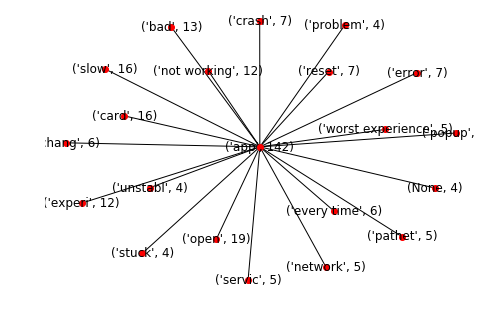

In [83]:
from sNetworkx import SNetworkx
snetworkx = SNetworkx()
totalShow = 20
t = sutility.getFamousTopics()[0]
r = sutility.getReasonDict()[0][1][0: totalShow]
print('topic:', t)
print('reasons', r)
snetworkx.inputData(t, r)
snetworkx.show()

In [84]:
sutility.showTopicCounts()
print('---------------------------------')
sutility.showReasonDict()

[('app', 142), ('account', 58), ('login', 53), ('debit card', 39), ('updat', 38), ('upi', 25), ('transact', 18), ('customer care', 12), ('version', 11), ('atm', 8), ('customer service', 7), ('kyc', 7), ('otp', 6), ('look', 5), ('balanc', 4), ('biometr', 4), ('signup', 3), ('service charge', 2), ('internet', 2), ('speed', 2), ('debit cards', 2), ('ifsc', 2), ('charg', 2), ('back option', 1), (None, 1), ('another bank', 1), ('offer', 1), ('permiss', 1), ('international transactions', 1), ('postal code', 1), ('physical card', 1), ('netbank', 1), ('withdrawl', 1), ('deals and offers', 1)]
---------------------------------
app
[('open', 19), ('slow', 16), ('card', 16), ('bad', 13), ('experi', 12), ('not working', 12), ('error', 7), ('crash', 7), ('reset', 7), ('chang', 6), ('every time', 6), ('popup', 5), ('worst experience', 5), ('servic', 5), ('pathet', 5), ('network', 5), (None, 4), ('stuck', 4), ('unstabl', 4), ('problem', 4), ('face', 4), ('fix it', 4), ('frustrat', 4), ('develop', 3),

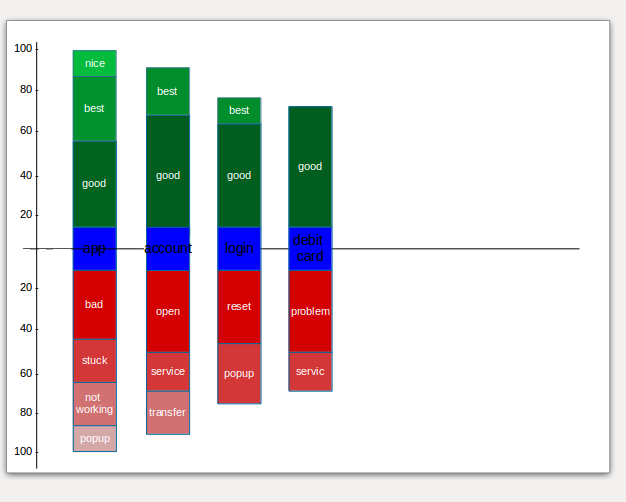

In [35]:
# from IPython.core.display import display, HTML
# # display(HTML('<h1>Hello, world!</h1>'))
# HTML(filename='g.html')
# from PIL import Image                                                                                
# img = Image.open('/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png')
# img.show() 

from IPython.display import Image

Image(filename = "/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png", width=500, height=500)

In [36]:
# sutility.showTopicCounts()
# sentList = commentsDocument.map()
# sentList = commentsDocument.map(getSentiment)

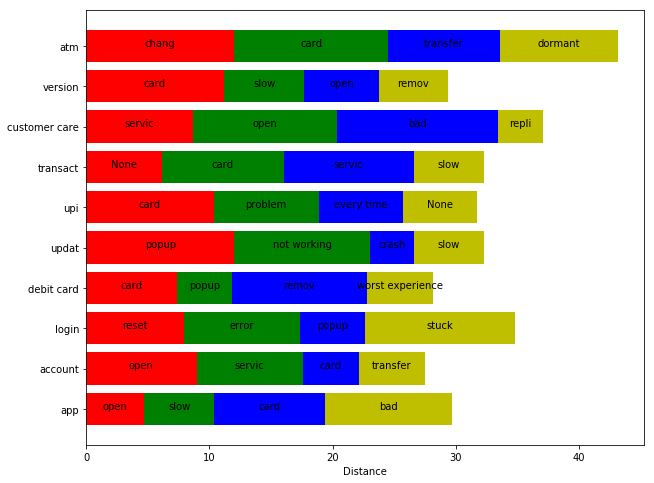

In [85]:
from sGraph import *
makeGraph(sutility.getReasonDict()) # topic + reason list

In [92]:
l = list(commentsDocument)
p = list(processed_doc)

length = len(l)

for i in range(length):
#     print(l[i])
    print(p[i])
    print()

authenticate me for contacting live agent is not working nonoptimized laggy app wont get cashbacks until you contact  times but still its a good app the online banking website on other hand is very good

awesome bank service and userfriendly bank app

this is very good bank and bank transfer limit is very high

superb job  the quickest

nice but cant understand the difference between zero and o in this app for acc no and ifsc code

supar

hasslefree banking system

useful and easy

good

i liked but to activate debit card it is taking long time

banking made damn easy love you dbs keep rocking 

please add option to see average monthlyquarterly balance

good

good bank

very good

nice services bt where to do fingerprint verification

very good app

good

good

very useful to transfer money to others within minuteand intrest level is good

i am new here and st time please consider user feedback very valuable please try to compare your ui with paytm bank ui you will going to find major 

In [29]:
# dump = list(zip(commentsDocument, processed_doc))
# length = len(dump)
# for i in range(length):
#     print(dump[i][0])
#     print(dump[i][1])
# #     print(sentList.iloc[i])
#     print()

In [62]:
import gensim
dictionary = gensim.corpora.Dictionary(processed_doc)
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]

In [ ]:
from gensim import corpora, models
corpus_tfidf = models.TfidfModel(bow_corpus)[bow_corpus]

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [ ]:
# indexFor = 5
# print('..COMMENT :', commentsDocument[indexFor])
# print('\n..CORPOS :', processed_doc[indexFor])
# # print('\n..BOW:', bow_corpus[indexFor])
# for index, score in sorted(lda_model_tfidf[bow_corpus[indexFor]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

In [ ]:
topics = lda_model_tfidf.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
# print(processed_doc.values)

In [ ]:
l = tokenDictWithPosNegSentiment(list(sentList), list(processed_doc))


In [ ]:
# print(sortedMostPos(l))

In [ ]:
from showBarGraph import *
# show positive bar graph
showBarCharForSentiment(sortedMostPos(l), pos=True)

In [ ]:
# print(sortedMostNeg(l))
# show positive bar graph
showBarCharForSentiment(sortedMostNeg(l), pos=False)

In [ ]:
showPiChart(sortedMostFreq(l))

In [ ]:
# showTempBarChart()

len of labels: 9


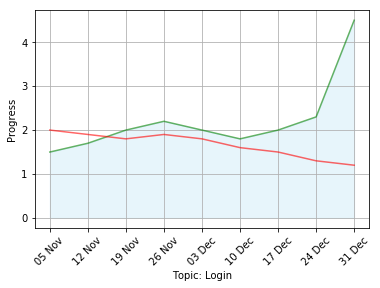

In [42]:
start_date = '01-11-2018' #  09-Sep-2018 (58 days)
end_date = '31-12-2018' # 01-Oct-2018

from sTimeProgressGraph import sTimeProgressGraph
st = sTimeProgressGraph()
x_dates = st.getAllFormatedDatesBetween(start_date, end_date)
st.showGraph(start_date, end_date)
# st.showTooltip()